In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import dask.dataframe as dd
import pandas as pd
import smps
import numpy as np
import joblib
import json
import seaborn as sns
import seaborn.objects as so
import plotly as py
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot
from smps.fit import LogNormal
sns.set("notebook", "ticks", palette='colorblind') 
%matplotlib inline

# 1. Read in Processced Data (No fogging, Shortened)

## 1.1 Timeseries files (already resampled to 6 min)

In [2]:
folder = '/Users/zahrashivji/Dropbox/Shivji/Final Data/Indoor Files/West Village/WV Hall/'

wv = dd.read_csv(
    folder + 'timeseries_forIgor.csv',
    parse_dates=['timestamp']
).compute()

# Set the index to be the timestamp
wv.set_index("timestamp", inplace=True) 

FileNotFoundError: [Errno 2] No such file or directory: '/Users/zahrashivji/Dropbox/Shivji/Final Data/Indoor Files/West Village/WV Hall/timeseries_forIgor.csv'

In [ ]:
wv.columns

In [ ]:
wv

## 1.2 Bias Plot files 

### 1.2.1 Geo. Mean Diameter (GM)

In [101]:
gm = dd.read_csv(
    folder + 'gm_noFogging_forIgor_Shortened.csv'
).compute()

In [102]:
gm.head(3)

,gm_key,Median (nm),Mean (nm),Mode (nm),Geo. Mean (nm),PM1_SMPS,PM_350_SMPS,PM_300_SMPS,% > 350nm,% > 300nm,...,PM1_frac_neph,PM25_frac_neph,PM10_frac_neph,PM25/PM1_neph,PM25/PM1_modpm,PMS PM1 bias,modpm PM1 bias,temp,rh,fogging_mask
0,bin1,30.986000,41.864000,29.961000,34.749000,1.154630,0.513954,0.570350,0.445125,0.493968,...,0.000000,0.000000,1.000000,NaN,1.039502,-1.000000,-0.593290,23.086667,26.393333,0.0
1,bin10,101.005789,110.519474,119.542895,91.206737,1.500955,0.289635,0.371621,0.264480,0.338532,...,0.058602,0.344501,0.596897,NaN,1.319931,-0.969310,-0.258905,23.730833,29.811731,0.0
2,bin3,42.126800,67.593200,30.859600,50.962000,0.841648,0.372101,0.418514,0.424885,0.481049,...,0.047639,0.226180,0.726180,NaN,1.724957,-0.994548,-0.427991,23.910833,26.536500,0.0


### 1.2.2 Relative Humidity (RH)

In [103]:
rh = dd.read_csv(
    folder + 'rh_noFogging_forIgor_Shortened.csv'
).compute()

In [104]:
rh.head(3)

,RH_key,Median (nm),Mean (nm),Mode (nm),Geo. Mean (nm),PM1_SMPS,PM_350_SMPS,PM_300_SMPS,% > 350nm,% > 300nm,...,PM1_frac_neph,PM25_frac_neph,PM10_frac_neph,PM25/PM1_neph,PM25/PM1_modpm,PMS PM1 bias,modpm PM1 bias,temp,rh,fogging_mask
0,bin1,72.253990,86.743186,70.496649,72.054206,1.724284,0.543372,0.653207,0.297850,0.360765,...,0.081818,0.334233,0.583949,NaN,1.141283,-0.978755,-0.453435,23.233789,24.373978,0.0
1,bin10,80.558720,93.541560,90.988000,77.335120,1.414907,0.390782,0.487328,0.273687,0.341996,...,0.005490,0.296821,0.697689,NaN,1.318924,-0.999235,-0.424745,23.712667,40.745267,0.0
2,bin2,68.122748,85.419017,62.804839,69.802830,2.017333,0.652002,0.781242,0.329123,0.389626,...,0.126453,0.323822,0.549725,NaN,1.173917,-0.935164,-0.420118,23.176377,25.701942,0.0


### 1.2.3 SMPS PM1 Mass Loading (ML)

In [105]:
ml = dd.read_csv(
    folder + 'ml_noFogging_forIgor_Shortened.csv'
).compute()

In [106]:
ml

,ml_key,Median (nm),Mean (nm),Mode (nm),Geo. Mean (nm),PM1_SMPS,PM_350_SMPS,PM_300_SMPS,% > 350nm,% > 300nm,...,PM1_frac_neph,PM25_frac_neph,PM10_frac_neph,PM25/PM1_neph,PM25/PM1_modpm,PMS PM1 bias,modpm PM1 bias,temp,rh,fogging_mask
0,bin1,64.771871,82.938643,57.259364,66.248800,0.744044,0.205284,0.251194,0.268247,0.330397,...,0.014244,0.099234,0.886521,NaN,1.329904,-0.999135,-0.441685,23.534976,27.963500,0.0
1,bin10,90.559429,102.642429,107.282857,86.732571,6.141725,0.839297,1.052058,0.272865,0.342129,...,0.192069,0.327252,0.480679,NaN,1.195959,-0.579083,-0.253038,23.647500,35.382738,0.0
2,bin2,70.223908,87.121040,72.375641,70.943341,1.212215,0.423642,0.496112,0.349436,0.409318,...,0.016383,0.207717,0.775900,NaN,1.238203,-0.997888,-0.454259,23.699744,30.028930,0.0
3,bin3,75.627750,89.197302,75.886586,75.257483,1.856223,0.500084,0.621108,0.270598,0.335580,...,0.064823,0.373890,0.561287,NaN,1.123953,-0.979942,-0.376666,23.290115,27.810273,0.0
4,bin4,76.012911,89.207656,77.187422,75.394456,2.475450,0.746125,0.905760,0.300603,0.365052,...,0.110866,0.391771,0.497363,NaN,1.054849,-0.943782,-0.405331,23.236185,25.892093,0.0
5,bin5,73.886224,86.889395,77.378368,73.130987,3.117412,0.848111,1.047338,0.274104,0.337887,...,0.195597,0.375038,0.429365,2.376546,1.032923,-0.846828,-0.354894,23.303882,26.088377,0.0
6,bin6,72.856667,85.660017,74.480483,71.640783,3.619401,0.893907,1.124686,0.246315,0.310007,...,0.232146,0.367069,0.400785,1.596762,1.035139,-0.789361,-0.320350,23.523111,27.248944,0.0
7,bin7,83.043857,96.178607,88.292143,81.457786,4.271117,1.268261,1.557200,0.296424,0.364104,...,0.238939,0.363032,0.398028,1.529923,1.027558,-0.690019,-0.262165,23.297798,30.895417,0.0
8,bin8,83.705731,97.075154,92.750385,81.813385,4.869694,1.639477,1.967202,0.336742,0.404065,...,0.239010,0.363142,0.397849,1.532892,1.027079,-0.692108,-0.314914,23.335833,31.654423,0.0
9,bin9,89.386263,101.535947,103.983316,85.927053,5.483527,1.561049,1.923989,0.285357,0.351534,...,0.253001,0.362349,0.384650,1.441033,1.024439,-0.599777,-0.250187,23.603421,36.342281,0.0


# 2. Plots

## 2.1 Timeseries

/var/folders/3x/bzpq51ls1_q2l69w2sj38xym0000gn/T/ipykernel_37869/62222841.py:81: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



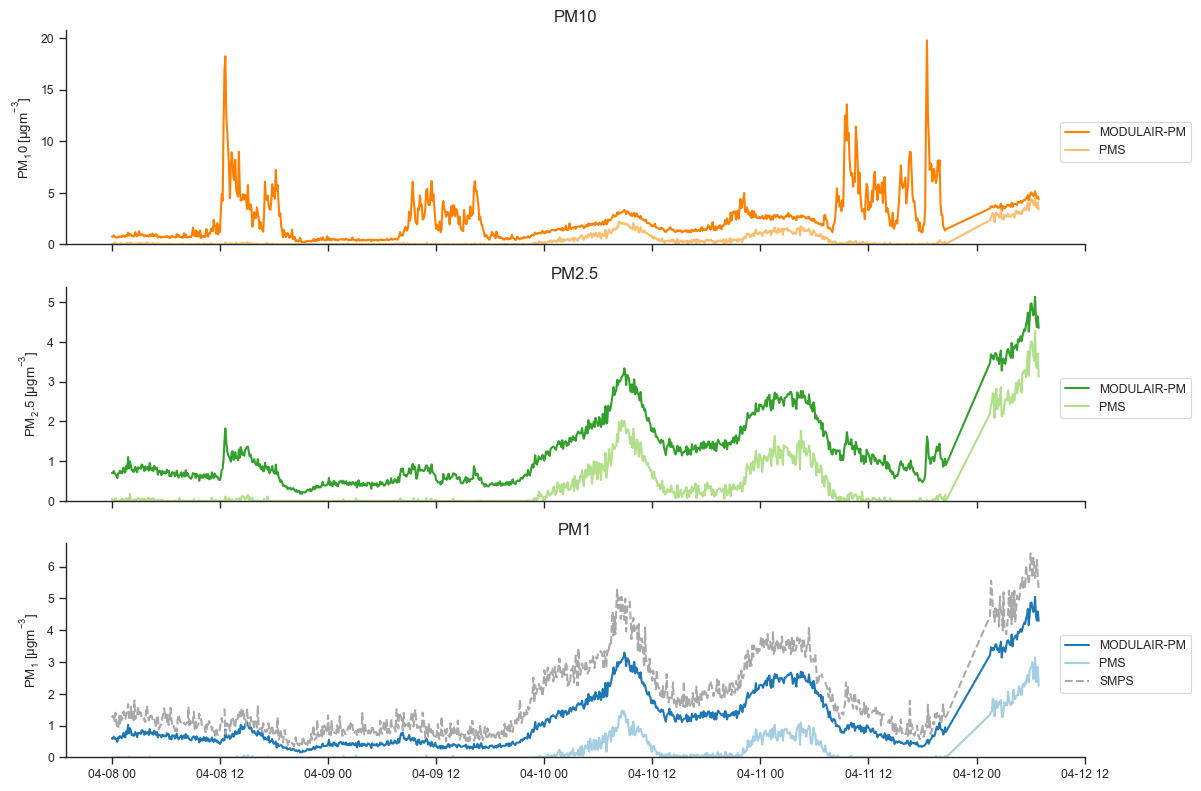

In [180]:
"""
"""
import numpy as np
import seaborn as sns
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.ticker import FuncFormatter

# set the label fontsize
xy_label_fontsize = 12

# force 'normal' text style for math text
mpl.rcParams['mathtext.default'] = 'regular'

def major_ticks(x, pos=None):
    """Set the major ticks according 
    to this custom style
    """
    x = mdates.num2date(x)
    if pos == 0:
        fmt = "%-d\n%-m\n%I\n%-M"
    else:
        fmt = "%-d"
    return x.strftime(fmt)

# set global seaborn params
sns.set("paper", "ticks", color_codes=True, palette='Paired')

# set up the matplotlib figure
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 8), edgecolor  = 'black', sharex=True)

# grab the current color palette
cmap = sns.color_palette("Paired")

# plot the PM10 data
ax[0].plot(data['PM10_modpm'], lw=1.5, label="MODULAIR-PM", color=cmap[7])
ax[0].plot(data['PM10_neph'], lw=1.5, label='PMS', color=cmap[6])
ax[0].set_ylabel("$PM_10 \; [\mu g m^{-3}]$")
ax[0].set_ylim(0, None)
ax[0].legend(bbox_to_anchor=(1.11, 0.6))

# plot the o3, so2, and no2 data on the second axis
ax[1].plot(data['PM25_modpm'], lw=1.5, label="MODULAIR-PM", color=cmap[3])
ax[1].plot(data['PM25_neph'], lw=1.5, label='PMS', color=cmap[2])
ax[1].set_ylabel("$PM_2.5 \; [\mu g m^{-3}]$")
ax[1].set_ylim(0, None)
ax[1].legend(bbox_to_anchor=(1.11, 0.6))

# plot the OPC bins on the third row (Of MODULAIR)
ax[2].plot(data['PM1_modpm'], lw=1.5, label="MODULAIR-PM", color=cmap[1])
ax[2].plot(data['PM1_neph'], lw=1.5, label='PMS', color=cmap[0])
ax[2].plot(data['PM1_SMPS'], lw=1.5, label='SMPS', color='darkgray', linestyle='dashed')
ax[2].set_ylabel("$PM_1 \; [\mu g m^{-3}]$")
ax[2].set_ylim(0, None)
ax[2].legend(bbox_to_anchor=(1.11, 0.6))

# # label the panels
# pct = 0.9
# ax[0].text("04-08 00", pct*ax[0].get_ylim()[-1], "(a)")
# ax[1].text("04-08 00", pct*ax[1].get_ylim()[-1], "(b)")
# ax[2].text("04-08 00", pct*ax[2].get_ylim()[-1], "(c)")

# set titles for each panel
ax[0].set_title("PM10", fontsize=12)
ax[1].set_title("PM2.5", fontsize=12)
ax[2].set_title("PM1", fontsize=12)

# remove the tiop and right spine
sns.despine()

# force a tight layout
plt.tight_layout()

# # save the figure
# fig.savefig(folder+'timeseries_whole_period.png', dpi=350, bbox_inches='tight')

fig.show()

## 2.2 Scatter Plots

### 2.2.1 PM1 

In [109]:
import statsmodels.formula.api as smf

dat = data

results = smf.ols("PM1_modpm ~ PM1_SMPS",data=dat).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              PM1_modpm   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                 1.597e+04
Date:                Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:28:01   Log-Likelihood:                 33.817
No. Observations:                 975   AIC:                            -63.63
Df Residuals:                     973   BIC:                            -53.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2021      0.013    -15.253      0.0

In [110]:
import statsmodels.formula.api as smf

dat = data

results = smf.ols("PM1_neph ~ PM1_SMPS",data=dat).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               PM1_neph   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     3081.
Date:                Sun, 30 Oct 2022   Prob (F-statistic):          8.40e-304
Time:                        15:28:02   Log-Likelihood:                -60.253
No. Observations:                 975   AIC:                             124.5
Df Residuals:                     973   BIC:                             134.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4251      0.015    -29.134      0.0

In [111]:
x_smps = [data['PM1_SMPS'].min(), data['PM1_SMPS'].max()]
y_neph = [data['PM1_SMPS'].min()*0.3569-0.4251, data['PM1_SMPS'].max()*0.3569-0.4251]
y_modpm = [data['PM1_SMPS'].min()*0.7378 -0.2021, data['PM1_SMPS'].max()*0.7378 -0.2021]

In [112]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=data["PM1_SMPS"], 
    y=data["PM1_modpm"], 
    mode = 'markers',
    marker_color = 'rgb(33, 120, 180)', 
    name = 'MODULAIR-PM'))

fig.add_trace(go.Scatter(
    x= x_smps,
    y= y_modpm,
    mode = 'lines',
    marker_color = 'rgb(33, 120, 180)',
    showlegend=False))

fig.add_trace(go.Scatter(
    x=data["PM1_SMPS"], 
    y=data["PM1_neph"], 
    mode = 'markers',
    marker_color = 'rgb(166, 206, 227)', 
    name = 'PMS'))

fig.add_trace(go.Scatter(
    x= x_smps,
    y= y_neph,
    mode = 'lines',
    marker_color = 'rgb(166, 206, 227)',
    showlegend=False))
              
fig.update_layout(
    autosize=False,
    width=600, height=600,
    xaxis=dict(title_text="$\\text{Reference }PM_1 [μg/m^{3}]$"),
    yaxis=dict(title_text="$\\text{LCS }PM_1 [μg/m^{3}]$")
) 

fig.layout.template = 'simple_white'

fig.show()

### 2.2.2 PM2.5

In [113]:
import statsmodels.formula.api as smf

dat = data

results = smf.ols("PM25_neph ~ PM25_modpm",data=dat).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              PM25_neph   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     8935.
Date:                Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:28:26   Log-Likelihood:                 18.968
No. Observations:                 982   AIC:                            -33.94
Df Residuals:                     980   BIC:                            -24.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5589      0.013    -43.868      0.0

In [114]:
x_modpm_pm25 = [data['PM25_modpm'].min(), data['PM25_modpm'].max()]
y_neph_pm25 = [data['PM25_modpm'].min()*0.7458-0.5589, data['PM25_modpm'].max()*0.7458-0.5589]

In [181]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=data["PM25_modpm"], 
    y=data["PM25_neph"], 
    mode = 'markers',
    marker_color = 'rgb(50, 160, 45)', 
    showlegend=False))

fig.add_trace(go.Scatter(
    x= x_modpm_pm25,
    y= y_neph_pm25,
    mode = 'lines',
    marker_color = 'rgb(50, 160, 45)',
    showlegend=False))
              
fig.update_layout(
    autosize=False,
    width=600, height=600,
    xaxis=dict(title_text="$\\text{Reference }PM_2.5 [μg/m^{3}]$"),
    yaxis=dict(title_text="$\\text{LCS }PM_2.5 [μg/m^{3}]$")
) 

fig.layout.template = 'simple_white'

fig.show()

### 2.2.3 PM10

In [116]:
import statsmodels.formula.api as smf

dat = data

results = smf.ols("PM10_neph ~ PM10_modpm",data=dat).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              PM10_neph   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     31.16
Date:                Sun, 30 Oct 2022   Prob (F-statistic):           3.08e-08
Time:                        15:28:31   Log-Likelihood:                -1171.6
No. Observations:                 982   AIC:                             2347.
Df Residuals:                     980   BIC:                             2357.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3083      0.038      8.091      0.0

In [117]:
x_modpm_pm10 = [data['PM10_modpm'].min(), data['PM10_modpm'].max()]
y_neph_pm10 = [data['PM10_modpm'].min()*0.0641+0.3083, data['PM10_modpm'].max()*0.0641+0.3083]

In [182]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=data["PM10_modpm"], 
    y=data["PM10_neph"], 
    mode = 'markers',
    marker_color = 'rgb(255, 127, 0)', 
    showlegend=False))

fig.add_trace(go.Scatter(
    x= x_modpm_pm10,
    y= y_neph_pm10,
    mode = 'lines',
    marker_color = 'rgb(255, 127, 0)',
    showlegend=False))
              
fig.update_layout(
    autosize=False,
    width=600, height=600,
    xaxis=dict(title_text="$\\text{Reference }PM_10 [μg/m^{3}]$"),
    yaxis=dict(title_text="$\\text{LCS }PM_10 [μg/m^{3}]$")
) 

fig.layout.template = 'simple_white'

fig.show()

## 2.3 Bias Plots 

### 2.3.1 Geo. Mean Diameter (GM)

(0.0, 8.0)

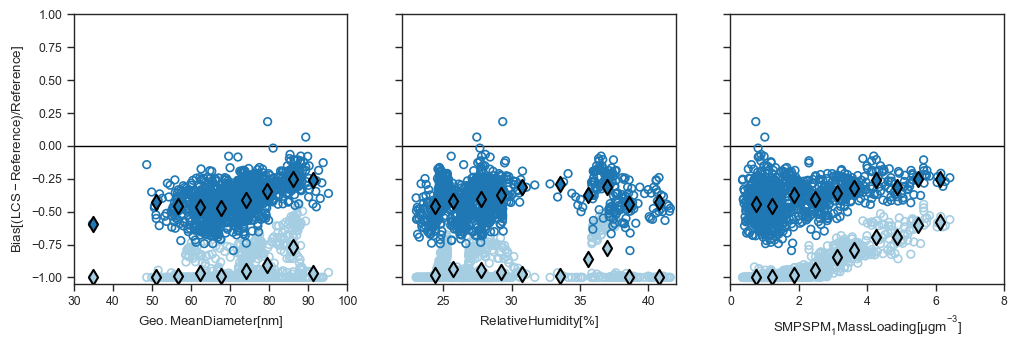

In [163]:
from matplotlib.markers import MarkerStyle

# Create temporary df to combine timeseries data and bias plot data
    # Columns need to have sampe dimensions to plot on same graph
tmp = data.copy()[["Geo. Mean (nm)", "PMS PM1 bias", "modpm PM1 bias", 'rh', 'PM1_SMPS']]

# Add gm data: first create empty column in tmp, then fill empty column w gm values
tmp['gm_group'] = pd.Series([np.nan]*tmp.shape[0])
tmp['gm_group'].iloc[0:gm.shape[0]] = gm["Geo. Mean (nm)"]
tmp['PMS_bias_gm'] = pd.Series([np.nan]*tmp.shape[0])
tmp['PMS_bias_gm'].iloc[0:gm.shape[0]] = gm["PMS PM1 bias"]
tmp['modpm_bias_gm'] = pd.Series([np.nan]*tmp.shape[0])
tmp['modpm_bias_gm'].iloc[0:gm.shape[0]] = gm["modpm PM1 bias"]

# Add rh data
tmp['rh_group'] = pd.Series([np.nan]*tmp.shape[0])
tmp['rh_group'].iloc[0:rh.shape[0]] = rh["rh"]
tmp['PMS_bias_rh'] = pd.Series([np.nan]*tmp.shape[0])
tmp['PMS_bias_rh'].iloc[0:rh.shape[0]] = rh["PMS PM1 bias"]
tmp['modpm_bias_rh'] = pd.Series([np.nan]*tmp.shape[0])
tmp['modpm_bias_rh'].iloc[0:rh.shape[0]] = rh["modpm PM1 bias"]

# Add ml data
tmp['ml_group'] = pd.Series([np.nan]*tmp.shape[0])
tmp['ml_group'].iloc[0:ml.shape[0]] = ml["PM1_SMPS"]
tmp['PMS_bias_ml'] = pd.Series([np.nan]*tmp.shape[0])
tmp['PMS_bias_ml'].iloc[0:ml.shape[0]] = ml["PMS PM1 bias"]
tmp['modpm_bias_ml'] = pd.Series([np.nan]*tmp.shape[0])
tmp['modpm_bias_ml'].iloc[0:ml.shape[0]] = ml["modpm PM1 bias"]

# set global seaborn params
sns.set("paper", "ticks", color_codes=True, palette='Paired')

# set up the matplotlib figure
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 3.5), edgecolor  = 'black', sharex=False, sharey=True)

# grab the current color palette
cmap = sns.color_palette("Paired")

# plot the gm data
ax[0].axhline(lw = 1, color='black', zorder = 0)
ax[0].scatter(tmp["Geo. Mean (nm)"], tmp['PMS PM1 bias'], s = 30, marker = MarkerStyle('o', fillstyle= 'none'), label="PMS", color=cmap[0])
ax[0].scatter(tmp["gm_group"], tmp['PMS_bias_gm'], s = 60, marker = 'd', label="PMS", edgecolors='black', lw = 1.5, color=cmap[0])
ax[0].scatter(tmp["Geo. Mean (nm)"], tmp['modpm PM1 bias'], s=30, marker = MarkerStyle('o', fillstyle= 'none'), label="MODULAIR-PM", color=cmap[1])
ax[0].scatter(tmp["gm_group"], tmp['modpm_bias_gm'], s = 60, marker = 'd', edgecolors='black', label="PMS", lw = 1.5, color=cmap[1])
ax[0].set_ylabel("$Bias [(LCS-Reference)/Reference]$")
ax[0].set_xlabel("$Geo. Mean Diameter [nm]$")
ax[0].set_ylim(-1.05, 1)
ax[0].set_xlim(30, 100)

# plot the rh data
ax[1].axhline(lw = 1, color='black', zorder = 0)
ax[1].scatter(tmp["rh"], tmp['PMS PM1 bias'], s = 30, marker = MarkerStyle('o', fillstyle= 'none'), label="PMS", color=cmap[0])
ax[1].scatter(tmp["rh_group"], tmp['PMS_bias_rh'], s = 60, marker = 'd', label="PMS", edgecolors='black', lw = 1.5, color=cmap[0])
ax[1].scatter(tmp["rh"], tmp['modpm PM1 bias'], s=30, marker = MarkerStyle('o', fillstyle= 'none'), label="MODULAIR-PM", color=cmap[1])
ax[1].scatter(tmp["rh_group"], tmp['modpm_bias_rh'], s = 60, marker = 'd', edgecolors='black', label="PMS", lw = 1.5, color=cmap[1])
ax[1].set_xlabel("$Relative Humidity [\%]$")
ax[1].set_ylim(-1.05, 1)
ax[1].set_xlim(22, 42)

# plot the ml data
ax[2].axhline(lw = 1, color='black', zorder = 0)
ax[2].scatter(tmp["PM1_SMPS"], tmp['PMS PM1 bias'], s = 30, marker = MarkerStyle('o', fillstyle= 'none'), label="PMS", color=cmap[0])
ax[2].scatter(tmp["ml_group"], tmp['PMS_bias_ml'], s = 60, marker = 'd', label="PMS", edgecolors='black', lw = 1.5, color=cmap[0])
ax[2].scatter(tmp["PM1_SMPS"], tmp['modpm PM1 bias'], s=30, marker = MarkerStyle('o', fillstyle= 'none'), label="MODULAIR-PM", color=cmap[1])
ax[2].scatter(tmp["ml_group"], tmp['modpm_bias_ml'], s = 60, marker = 'd', edgecolors='black', label="PMS", lw = 1.5, color=cmap[1])
ax[2].set_xlabel("$SMPS PM_1 Mass Loading [\mu g m^{-3}]$")
ax[2].set_ylim(-1.05, 1)
ax[2].set_xlim(0, 8)

## 2.4 SMPS PM1 dNdlogDp

Text(0, 0.5, '${dN/dlogD}_p$')

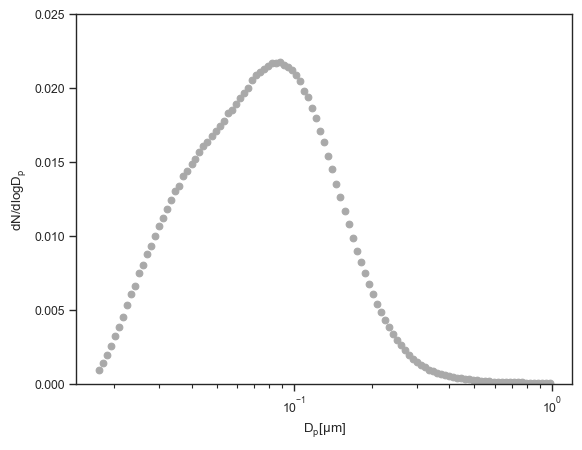

In [179]:
numerator1 = obj.dndlogdp.mean()
denominator1 = obj.dndlogdp.mean().sum()

plt.scatter(
    x=obj.midpoints,
    y= numerator1/denominator1,
    color='darkgray')

plt.xscale('log')
plt.ylim(0, 0.025)
plt.xlabel("${D}_p  [μm]$")
plt.ylabel("${dN/dlogD}_p$")